### Library Imports

In [68]:
import numpy as np
import matplotlib.pyplot as plt

---

Logistic Growth Differential Equation:
$ \frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right) $

Where:

$ P(t) $ is the population at time $ t $. <br>
$ r $ is the growth rate. <br>
$ K $ is the carrying capacity of the environment. <br>


Exact Solution for Logistic Growth:
$ P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)} $ <br>

Where:

 $ P_0 $ is the initial population. <br>
 ![Alt text](image.png)

https://www.khanacademy.org/science/ap-biology/ecology-ap/population-ecology-ap/a/exponential-logistic-growth

In [69]:
def logistic_growth(t, P, r, K):
    """
    Computes the logistic growth value.
    t: time
    P: current population
    r: growth rate
    K: carrying capacity
    """
    return r * P * (1 - P / K)


def exact_solution(t, P0, r, K):
    """
    Computes the exact solution for logistic growth.
    t: time
    P0: initial population
    r: growth rate
    K: carrying capacity
    """
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))


def predictor_corrector(y0, t0, h, N, r, K):
    """
    Uses the Predictor-Corrector method to approximate the solution of the logistic growth.
    y0: initial value
    t0: initial time
    h: step size
    N: number of steps
    r: growth rate
    K: carrying capacity
    """
    # Initialize lists to store time and population values
    t = [t0]
    P = [y0]
    
    # Bootstrap using 4th order Runge-Kutta for the first step
    for i in range(1):
        k1 = h * logistic_growth(t[-1], P[-1], r, K)
        k2 = h * logistic_growth(t[-1] + 0.5 * h, P[-1] + 0.5 * k1, r, K)
        k3 = h * logistic_growth(t[-1] + 0.5 * h, P[-1] + 0.5 * k2, r, K)
        k4 = h * logistic_growth(t[-1] + h, P[-1] + k3, r, K)

        P.append(P[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        t.append(t[-1] + h)
    
    # Iterate using the Predictor-Corrector method
    for i in range(1, N):
        # Predictor
        P_predict = P[-1] + h * (1.5 * logistic_growth(t[-1], P[-1], r, K) - 0.5 * logistic_growth(t[-2], P[-2], r, K))
        t_predict = t[-1] + h
        
        # Corrector
        P_correct = P[-1] + h/2 * (logistic_growth(t[-1], P[-1], r, K) + logistic_growth(t_predict, P_predict, r, K))
        
        P.append(P_correct)
        t.append(t_predict)
    
    return t, P

# Parameters
t0 = 0.0  # Initial time
P0 = 10.0  # Initial population
h = 0.1  # Step size
N = 100  # Number of steps
r = 0.1  # Growth rate
K = 1000  # Carrying capacity

t_vals, P_vals = predictor_corrector(P0, t0, h, N, r, K)


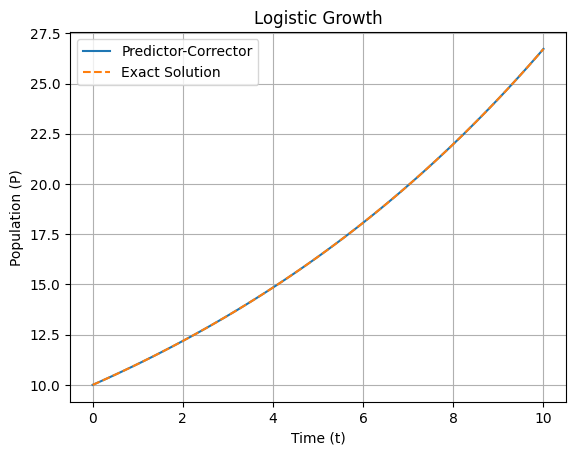

In [70]:
# Visualization
plt.plot(t_vals, P_vals, label="Predictor-Corrector")
plt.plot(t_vals, [exact_solution(t, P0, r, K) for t in t_vals], '--', label="Exact Solution")
plt.xlabel('Time (t)')
plt.ylabel('Population (P)')
plt.legend()
plt.title("Logistic Growth")
plt.grid(True)
plt.show()

In [71]:
def logistic_growth(t, P, r, K):
    """
    Computes the logistic growth value.
    t: time
    P: current population
    r: growth rate
    K: carrying capacity
    """
    return r * P * (1 - P / K)


def exact_solution(t, P0, r, K):
    """
    Computes the exact solution for logistic growth.
    t: time
    P0: initial population
    r: growth rate
    K: carrying capacity
    """
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))


def predictor_corrector(y0, t0, h, N, r, K):
    """
    Uses the Predictor-Corrector method to approximate the solution of the logistic growth.
    y0: initial value
    t0: initial time
    h: step size
    N: number of steps
    r: growth rate
    K: carrying capacity
    """
    # Initialize lists to store time and population values
    t = [t0]
    P = [y0]
    
    # Bootstrap using 4th order Runge-Kutta for the first step
    for i in range(1):
        k1 = h * logistic_growth(t[-1], P[-1], r, K)
        k2 = h * logistic_growth(t[-1] + 0.5 * h, P[-1] + 0.5 * k1, r, K)
        k3 = h * logistic_growth(t[-1] + 0.5 * h, P[-1] + 0.5 * k2, r, K)
        k4 = h * logistic_growth(t[-1] + h, P[-1] + k3, r, K)

        P.append(P[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        t.append(t[-1] + h)
    
    # Iterate using the Predictor-Corrector method
    for i in range(1, N):
        # Predictor
        P_predict = P[-1] + h * (1.5 * logistic_growth(t[-1], P[-1], r, K) - 0.5 * logistic_growth(t[-2], P[-2], r, K))
        t_predict = t[-1] + h
        
        # Corrector
        P_correct = P[-1] + h/2 * (logistic_growth(t[-1], P[-1], r, K) + logistic_growth(t_predict, P_predict, r, K))
        
        P.append(P_correct)
        t.append(t_predict)
    
    return t, P

# Parameters
t0 = 0.0  # Initial time
P0 = 10.0  # Initial population
h = 0.1  # Step size
N = 100  # Number of steps
r = 1  # Growth rate --> not even bunnies are this good. This is more like yeast :)
K = 1000  # Carrying capacity

t_vals, P_vals = predictor_corrector(P0, t0, h, N, r, K)


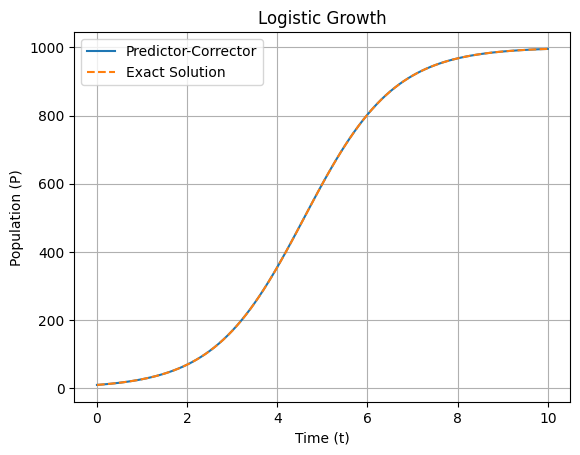

In [72]:
# Visualization
plt.plot(t_vals, P_vals, label="Predictor-Corrector")
plt.plot(t_vals, [exact_solution(t, P0, r, K) for t in t_vals], '--', label="Exact Solution")
plt.xlabel('Time (t)')
plt.ylabel('Population (P)')
plt.legend()
plt.title("Logistic Growth")
plt.grid(True)
plt.show()